In [1]:
import operator
from functools import reduce

In [2]:
numbers = [1,2,3,4,5]

result = reduce(operator.add, numbers)
print(result)

15


In [3]:
def product(a,b):
    return a * b

In [4]:
result = reduce(product, numbers)
print(result)

120


In [5]:
def merge(a: list|int|str, b: list|int|str ):
    return a + b

In [6]:
merge([1,2,3], [4,5,6])

[1, 2, 3, 4, 5, 6]

In [7]:
merge("hello", "world")

'helloworld'

In [9]:
result = reduce(merge, numbers)
print(result)

15


In [10]:
items = [[1,2],[3,4],[5,6]]
result = reduce(merge, items)
print(result)

[1, 2, 3, 4, 5, 6]


In [11]:
# lets implement a reducer which will remove duplicate items after merge

def merge(a: list, b: list ) -> list:
    return list(set(a + b))

In [12]:
items = [[1,2],[3,4],[5,6]]
result = reduce(merge, items)
print(result)

[1, 2, 3, 4, 5, 6]


In [13]:
items = [[1,2,3],[3,4,5],[5,6,7]]
result = reduce(merge, items)
print(result)

[1, 2, 3, 4, 5, 6, 7]


In [24]:
a = {'name': 'test'}
b = {'age': 10}
c = {'name': 'testing'}


In [25]:
a.update(b)
print(a)

{'name': 'test', 'age': 10}


In [26]:
print(a)
a.update(c)
print(a)

{'name': 'test', 'age': 10}
{'name': 'testing', 'age': 10}


In [36]:
def merge(a: dict, b:dict) -> dict:
    a.update(b)
    return a

In [39]:
def make_empty(a, b) -> dict:
    return {}

In [37]:
items = [
    {
        'name': 'test',
        'age': 10
    },
    {
        'city': 'Hyderabad'
    },
    {
        'name': 'qt'
    }
]

In [38]:
reduce(merge, items)

{'name': 'qt', 'age': 10, 'city': 'Hyderabad'}

In [40]:
reduce(make_empty, items)

{}

In [41]:
def merge(a: dict, b:dict) -> dict:
    a.update(b)
    return a

In [42]:
items = [
    {
        'name': 'test',
    },
    {
        'city': 'Hyderabad'
    },
    {
        'age': 10
    }
]

In [43]:
reduce(merge, items)

{'name': 'test', 'city': 'Hyderabad', 'age': 10}

In [44]:
items = [
    {
        'name': 'test',
    },
    {
        'city': 'Hyderabad'
    },
    {
        'age': 10,
        'name': 'qt'
    }
]

In [45]:
reduce(merge, items)

{'name': 'qt', 'city': 'Hyderabad', 'age': 10}

In [ ]:
from langgraph.graph import StateGraph, START, END, MessagesState

In [49]:
from typing import Annotated, TypedDict
from operator import add

In [ ]:
class MathState(TypedDict, total=False):
    a: int
    b: int
    result:Annotated[list[int], add] # result data type & its reducer

In [55]:
def add(state: MathState):
    return {'result': [state['a'] + state['b']] }

def sub(state: MathState):
    return {'result': [state['a'] - state['b']] }

In [56]:
my_math_graph = StateGraph(MathState)
my_math_graph.add_node("sum", add)
my_math_graph.add_node("diff", sub)
my_math_graph.add_edge(START, "sum")
my_math_graph.add_edge(START, "diff")
my_math_graph.add_edge("sum", END)
my_math_graph.add_edge("diff", END)
graph = my_math_graph.compile()

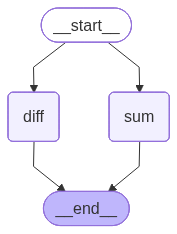

In [57]:
from utils import draw_graph
draw_graph(graph)

In [58]:
result = graph.invoke({'a': 10, 'b': 3})

In [59]:
result

{'a': 10, 'b': 3, 'result': [7, 13]}

In [ ]:
def my_reducer(a, b):
    return b